## Reproduction script for Table 2 in Greenland's CRM validity paper

In [1]:
import greenland_criterion as gc
import numpy as np

In [2]:
p = -1 
q = -1 
r = 0 

### Case setup

In [66]:
x = [0.001 ,0.5,0.5]
y = [0.001 ,0.5 ,0.001]
z = [-0.001 , -0.5, -0.001]

l1 = [-1,-1,-1]
l2 = [-100,-100,-100]
l3 = [-10000,-10000,-101]

T = [np.array([[1,p,q],[x[i],1,r],[y[i],z[i],1]]) for i in range(3)]
D = [np.diag([l1[i],l2[i],l3[i]]) for i in range(3)]
M = [T[i]@D[i]@np.linalg.inv(T[i]) for i in range(3)]

In [67]:
crmA = [gc.CRMAnalyser(Mat) for Mat in M]
indices = [a.getPotentialCRMs(tol=1e-3) for a in crmA]
crm1=[a.generateCRM([0],exactMeff=True) for a in crmA]
crm2=[a.generateCRM([0,1],exactMeff=True) for a in crmA]
print(indices)

[[array([0]), array([0, 1])], [], [array([0, 1])]]


In [5]:
for i in range(3):
    print("Case "+str(i+1)+":")
    print("Single P state:")
    print("$\delta T_P^{-1}$:",crm1[i][0].dTpInv)
    print("$-\Delta T_Q^{-1}$:",crm1[i][0].dTqInv)
    print("error:",crm1[i][1])
    print("Two P states:")
    print("$\delta T_P^{-1}$:",crm2[i][0].dTpInv)
    print("$-\Delta T_Q^{-1}$:",crm2[i][0].dTqInv)
    print("error:",crm2[i][1])
    

Case 1:
Single P state:
$\delta T_P^{-1}$: [[0.001]
 [0.001]]
$-\Delta T_Q^{-1}$: [[1.001 1.   ]]
error: 0.0014156263603098186
Two P states:
$\delta T_P^{-1}$: [[ 1.00000000e-03 -8.37004077e-17]]
$-\Delta T_Q^{-1}$: [[1.00000000e+00]
 [1.00544259e-16]]
error: 0.0024142118981618273
Case 2:
Single P state:
$\delta T_P^{-1}$: [[0.5]
 [0.5]]
$-\Delta T_Q^{-1}$: [[1.5 1. ]]
error: 0.8660254037844388
Two P states:
$\delta T_P^{-1}$: [[0.5 0. ]]
$-\Delta T_Q^{-1}$: [[ 1.0000000e+00]
 [-2.0035576e-16]]
error: 1.0487547899806597
Case 3:
Single P state:
$\delta T_P^{-1}$: [[0.5  ]
 [0.001]]
$-\Delta T_Q^{-1}$: [[1.001 1.   ]]
error: 0.6324554371654152
Two P states:
$\delta T_P^{-1}$: [[1.00000000e-03 1.73472348e-17]]
$-\Delta T_Q^{-1}$: [[1.0000000e+00]
 [4.0467668e-14]]
error: 0.0022649103081032523


In [54]:
M = M[0]
print(M)

[[-1.10779419e+01  9.89109801e+01  9.98892206e+03]
 [ 8.89309512e-02 -9.99109801e+01  8.89309512e-02]
 [ 9.98892206e+00  9.89109801e-02 -9.99001108e+03]]


In [55]:
gc.diagM(M)


(array([-1.e+00, -1.e+02, -1.e+04]),
 array([[ 9.99999095e-01,  7.07106604e-01, -7.07106781e-01],
        [ 8.99999186e-04, -7.07106604e-01,  1.28085438e-16],
        [ 9.99999095e-04,  7.07106604e-04,  7.07106781e-01]]))

In [56]:
crm3=gc.CRMAnalyser(M)

In [57]:
ind = crm3.getPotentialCRMs(tol=1e-3)


In [58]:
print(ind)

[array([0]), array([0, 1])]


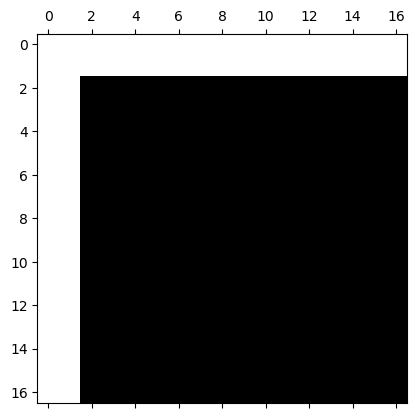

In [40]:
import matplotlib.pyplot as plt
plt.spy(M)
